# Sesi 15 / Model Deployment




## Importing Libraries



Notes: Profiling boleh diinstall atau tidak diinstall. Dalam sesi ini, profiling hanya digunakan menjadi contoh untuk memudahkan analisa.

Lewati cell report = data.profile_report(title='Campus Placement Data - Report', progress_bar=False) Jika memutuskan untuk tidak menggunakan profiling.



In [1]:
!pip install -U pandas-profiling


In [2]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/Placement_Data_Full_Class.csv')
#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

### Examining Dataset


In [4]:
data.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Kesimpulan

- Kami memiliki data kualifikasi Gender dan Pendidikan
- Kami memiliki semua data kinerja (skor) pendidikan
- Kami memiliki status penempatan dan detail gaji
- Kita dapat mengharapkan nilai nol dalam gaji karena kandidat yang tidak ditempatkan tidak akan memiliki gaji
- Status penempatan adalah variabel target kami sisanya adalah variabel independen kecuali gaji

In [5]:
print ("The shape of the  data is (row, column):"+ str(data.shape))
print (data.info())

The shape of the  data is (row, column):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [6]:
report = data.profile_report(title="campus report", progress_bar=False)

In [7]:
report = data.profile_report(title='Campus Placement Data - Report',progress_bar=False)
report

# Uncomment syntax below to make new html file

# report.to_file(output_file='output.html')

- 67 Nilai yang hilang dalam Gaji untuk siswa yang tidak ditempatkan. Nilai NaN perlu diisi.
- Data tidak diskalakan. Kolom gaji berkisar antara 200k-940k, kolom numerik lainnya adalah persentase.
- 300k pada Persentil ke-75 berjalan hingga maks 940k, dalam Gaji (skewnwss tinggi). Dengan demikian, outlier pada akhir gaji tinggi.

Data Cleaning / Handling missing values


In [8]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',
      data['salary'].isnull().sum(), sep = '\n')


Salary column with null values:
0


Exploring Data by each Features (Optional)


In [9]:
"""
Feature: Gender

Does gender affect placements?
"""

data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


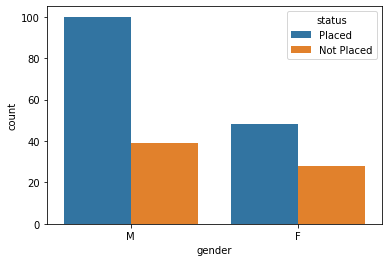

In [10]:
sns.countplot("gender", hue="status", data=data)
plt.show()

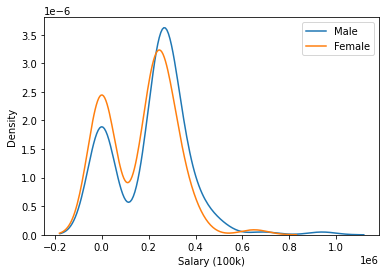

In [11]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


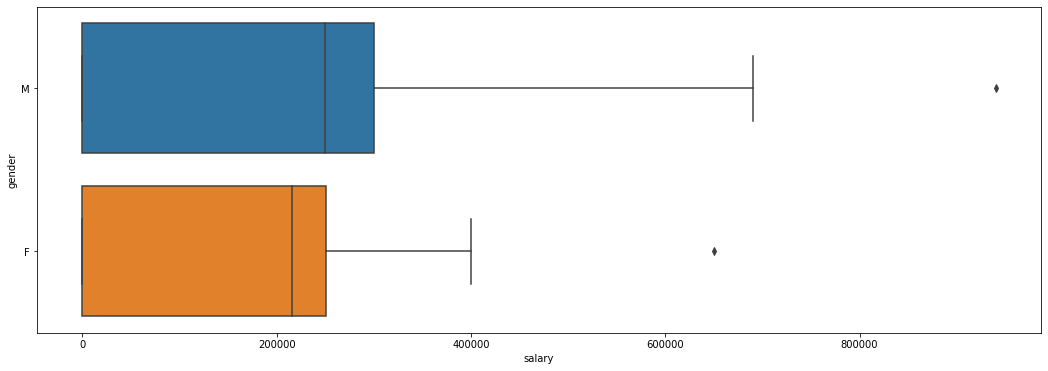

In [12]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

Wawasan

- Kami memiliki sampel 139 siswa laki-laki dan 76 siswa perempuan.
- 30 siswa perempuan dan 40 siswa laki-laki tidak ditempatkan. - - Siswa laki-laki memiliki penempatan yang relatif lebih tinggi.
- Siswa laki-laki ditawari gaji yang sedi

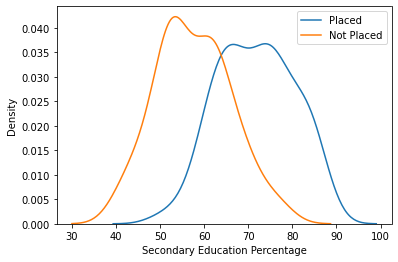

In [13]:
"""
Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)

Does Secondary Education affect placements?
"""
sns.kdeplot(data.ssc_p[data.status=="Placed"])
sns.kdeplot(data.ssc_p[data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

- Semua siswa dengan Persentase Pendidikan Menengah di atas 90% ditempatkan
- Semua siswa dengan Persentase Pendidikan Menengah di bawah 50% tidak ditempatkan
- Siswa dengan Persentase Pendidikan Menengah yang baik ditempatkan rata-rata.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


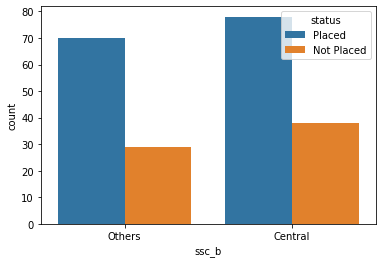

In [14]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()


Board Of Education tidak banyak mempengaruhi Placement Status.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


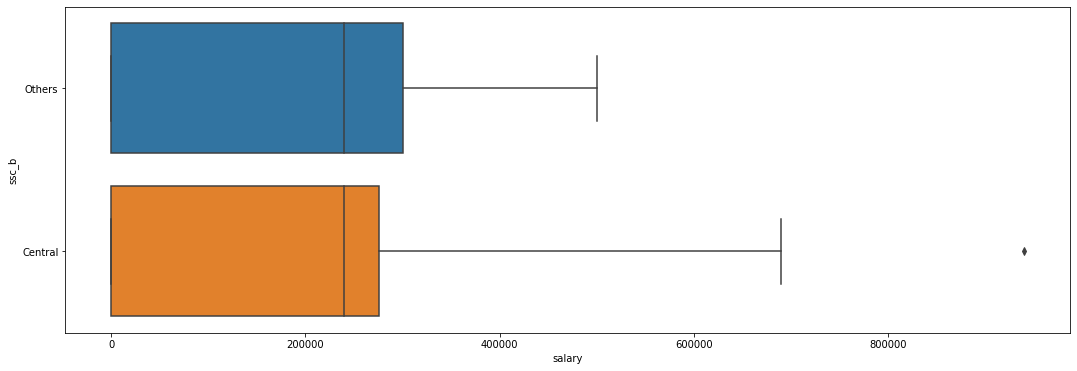

In [15]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

Outliers terdapat pada keduanya, tetapi siswa dari Central Board mendapatkan pekerjaan bergaji tinggi.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


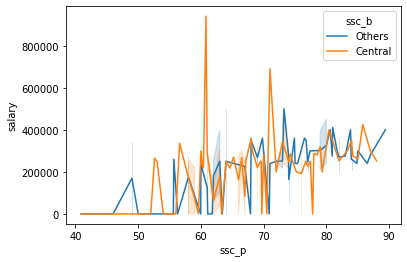

In [16]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

Tidak ada pola khusus (correlation) antara Secondary Education Percentage dan Salary. Board of Education Tidak Mempengaruhi Gaji

Kita dapat membuat grafik sendiri dari sini.

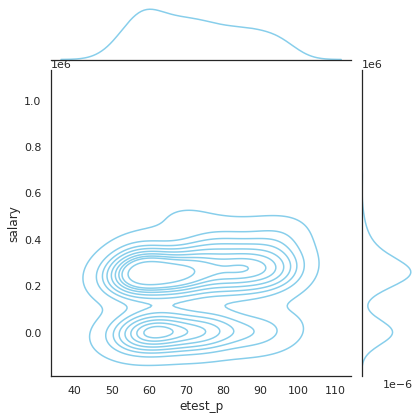

In [17]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")

plt.show()

- Sebagian besar kandidat yang mendapat skor sekitar 60 persen mendapat paket yang layak sekitar 3 lakh PA
- Tidak banyak kandidat yang menerima gaji lebih dari 4 lakh PA
- Bagian padat bawah menunjukkan kandidat yang tidak ditempatkan

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

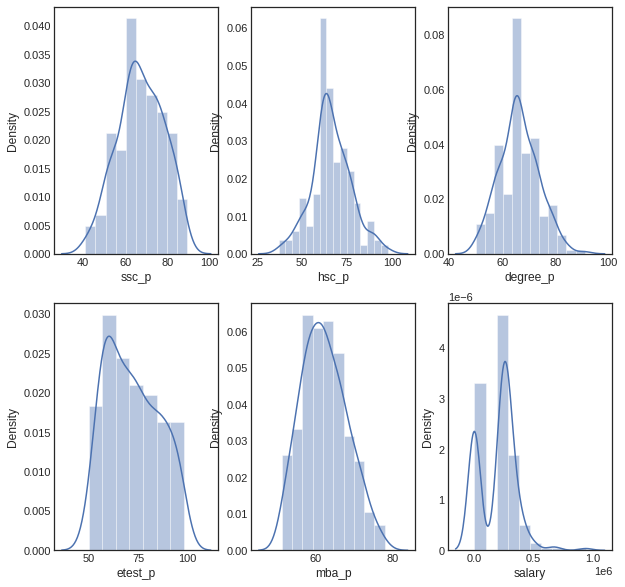

In [18]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

- Semua distribusi mengikuti distribusi normal kecuali fitur gaji
- Sebagian besar kinerja pendidikan calon adalah antara 60-80%
- Distribusi gaji mendapat outlier dimana hanya sedikit yang mendapat gaji 7,5L dan 10L PA

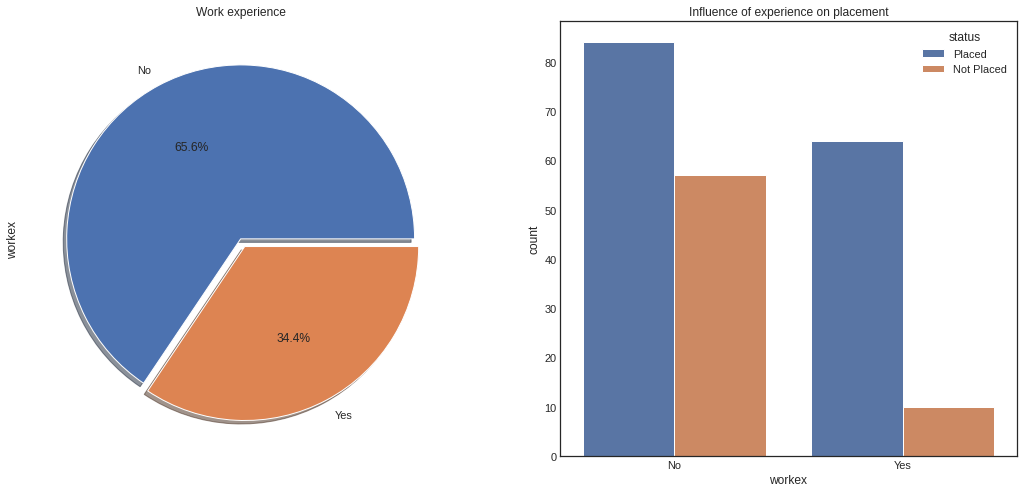

In [19]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = data)
ax[1].set_title('Influence of experience on placement')

plt.show()

- Kami memiliki hampir 66,2% kandidat yang tidak pernah memiliki pengalaman kerja
- Kandidat yang tidak pernah memiliki pengalaman kerja lebih banyak dipekerjakan daripada yang memiliki pengalaman
- Kita dapat menyimpulkan bahwa pengalaman kerja tidak mempengaruhi kandidat dalam proses rekrutmen

## Preprocessing data for classfication models


In [20]:
pip install sklearn

In [21]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [22]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Seperating Features and Target
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [24]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [25]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8153846153846154
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.87      0.87      0.87        45

    accuracy                           0.82        65
   macro avg       0.78      0.78      0.78        65
weighted avg       0.82      0.82      0.82        65



In [26]:
X_test

,ssc_p,hsc_p,degree_p,etest_p
34,62.00,51.0,52.00,68.44
207,83.33,78.0,61.00,88.56
111,51.00,54.0,61.00,60.00
18,63.00,66.0,64.00,68.00
92,60.23,69.0,66.00,72.00
...,...,...,...,...
93,52.00,62.0,54.00,72.00
16,63.00,66.2,65.60,60.00
19,60.00,67.0,70.00,50.48
2,65.00,68.0,64.00,75.00


In [27]:
#Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8615384615384616
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.89      0.91      0.90        45

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



In [28]:
#Using Logistic Regression

LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



# Getting ready for deployment


## Pickle

Modul pickle Python digunakan untuk serializing dan de-serializing struktur objek Python. Objek apa pun dengan Python dapat dibuat pickled sehingga dapat disimpan di disk. Apa yang dilakukan pickle adalah 'serializes' objek terlebih dahulu sebelum menulisnya ke file. Pickling adalah cara untuk mengubah objek python (list, dict, etc.) Menjadi character stream. Idenya adalah bahwa character stream ini berisi semua informasi yang diperlukan untuk merekonstruksi objek dalam skrip python lain.



In [30]:
pickle.dump(random_forest, open('model_classifier.pkl','wb'))


## Brief introduction to HTML and CSS


HTML adalah standard markup language untuk membuat halaman Web.



## What is HTML?
- HTML stands for Hyper Text Markup Language
- HTML is the standard markup language for creating Web pages
- HTML describes the structure of a Web page
- HTML consists of a series of elements
- HTML elements tell the browser how to display the content
- HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc.

## A Simple HTML Document


```
<!DOCTYPE html>
<html>
<head>
  <title>Page Title</title>
</head>
<body>

  <h1>My First Heading</h1>
  <p>My first paragraph.</p>

</body>
</html>
```

- ```<!DOCTYPE html>``` mendefinisikan bahwa dokumen ini adalah dokumen HTML5
- ```<html>``` elemen adalah elemen root dari halaman HTML
- ```<head>``` elemen berisi informasi meta tentang halaman HTML
- ```<title>``` elemen menentukan judul untuk halaman HTML (yang ditampilkan di judul browser atau di tab halaman)
- ```<body>``` elemen mendefinisikan badan dokumen, dan merupakan wadah untuk semua konten yang terlihat, seperti headings, paragraphs, images, hyperlinks, tables, lists, dll.
- ```<h1>``` elemen mendefinisikan headingbesar
- The ```<p>``` element mendefinisikan sebuah paragraph

## What is an HTML Element?


Elemen HTML ditentukan oleh tag awal, beberapa konten, dan tag akhir:

```<tagname>Content goes here...</tagname>```

Elemen HTML adalah apapun yang dimulai dari tag awal hingga tag akhir:

```
<h1>My First Heading</h1>
<p>My first paragraph.</p>
```

CSS adalah singkatan dari Cascading Style Sheets.

CSS menghemat banyak pekerjaan. CSS dapat mengontrol tata letak beberapa halaman web sekaligus.

## What is CSS?


Cascading Style Sheets (CSS) digunakan untuk memformat tata letak halaman web.

Dengan CSS, kita dapat mengontrol warna, font, ukuran teks, jarak antar elemen, bagaimana elemen diposisikan dan ditata, gambar latar belakang atau warna latar yang akan digunakan, tampilan yang berbeda untuk perangkat dan ukuran layar yang berbeda, dan banyak lagi.

## CSS Syntax


Set aturan CSS terdiri dari selector dan declaration block:



<img src="https://i.ibb.co/zbJTWJ3/css.gif" width="500" align="center">


- The selector points to the HTML element you want to style.
- The declaration block contains one or more declarations separated by semicolons.
- Each declaration includes a CSS property name and a value, separated by a colon.
- Multiple CSS declarations are separated with semicolons, and declaration blocks are surrounded by curly braces.

## Using CSS


CSS dapat ditambahkan ke dokumen HTML dengan 3 cara:

CSS dapat ditambahkan ke dokumen HTML dengan 3 cara:

- Inline - by using the style attribute inside HTML elements
- Internal - by using a ```<style>``` element in the ```<head>``` section
- External - by using a ```<link>``` element to link to an external CSS file

Cara paling umum untuk menambahkan CSS, adalah menempatkan style dalam file CSS eksternal.

## Inline CSS
Inline CSS digunakan untuk menerapkan style unik ke satu elemen HTML.

Inline CSS menggunakan style attribute dari elemen HTML.

Contoh berikut bagaimana cara mengatur warna teks elemen ```<h1>``` menjadi biru, dan warna teks elemen ```<p>`` menjadi merah:

```
<h1 style="color:blue;">A Blue Heading</h1>

<p style="color:red;">A red paragraph.</p>
```


## Internal CSS

CSS internal digunakan untuk menentukan style untuk satu halaman HTML.

CSS internal ditentukan di bagian <head> halaman HTML, dalam elemen <style>.

Contoh berikut mengatur warna teks SEMUA elemen <h1> (pada halaman itu) menjadi biru, dan warna teks SEMUA elemen <p> menjadi merah. Selain itu, halaman akan ditampilkan dengan warna latar belakang "powderblue":

```
<!DOCTYPE html>
<html>
<head>
<style>
  body {background-color: powderblue;}
  h1   {color: blue;}
  p    {color: red;}
</style>
</head>
<body>

  <h1>This is a heading</h1>
  <p>This is a paragraph.</p>

</body>
</html>
```

## External CSS
Style sheet eksternal digunakan untuk menentukan style untuk banyak halaman HTML.

Untuk menggunakan style sheet eksternal, tambahkan link ke dalamnya di bagian <head> pada setiap halaman HTML:

```
<!DOCTYPE html>
<html>
<head>
  <link rel="stylesheet" href="styles.css">
</head>
<body>

  <h1>This is a heading</h1>
  <p>This is a paragraph.</p>

</body>
</html>
```

Style sheet eksternal dapat ditulis di editor teks manapun. File tidak boleh berisi kode HTML apa pun, dan harus disimpan dengan ekstensi .css.

Berikut adalah tampilan file styles.css:

```
body {
  background-color: powderblue;
}
h1 {
  color: blue;
}
p {
  color: red;
}
```

# Creating web app with Flask

Pastikan flask sudah terinstall dengan ```pip install flask```.

Minimal Flask application terlihat seperti ini:

In [31]:
!pip install flask

In [32]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

In [33]:
@app.route('/')
def index():
    return 'Index Page'

@app.route('/hello')
def hello():
    return 'Hello, World'


In [34]:
from markupsafe import escape

@app.route('/user/<username>')
def show_user_profile(username):
    # show the user profile for that user
    return 'User %s' % escape(username)

@app.route('/post/<int:post_id>')
def show_post(post_id):
    # show the post with the given id, the id is an integer
    return 'Post %d' % post_id

@app.route('/path/<path:subpath>')
def show_subpath(subpath):
    # show the subpath after /path/
    return 'Subpath %s' % escape(subpath)

## HTTP Methods


Aplikasi web menggunakan metode HTTP yang berbeda saat mengakses URL. Kita harus membiasakan diri dengan metode HTTP saat kita bekerja dengan Flask. Secara default, route hanya menjawab permintaan GET . Kita bisa menggunakan argumen metode dekorator route()  untuk menangani metode HTTP yang berbeda.

In [35]:
from flask import request

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        return do_the_login()
    else:
        return show_the_login_form()

Flask akan mencari templates di folder templates . Jadi, jika aplikasi kita adalah sebuah modul, folder ini berada di sebelah modul tersebut, jika itu sebuah paket, itu sebenarnya ada di dalam packagekita:

Case 1: a module:



## Install Virtual Environment 

In [38]:
!pip install virtualenv

     |████████████████████████████████| 8.8 MB 5.4 MB/s 
     |████████████████████████████████| 461 kB 32.5 MB/s 


## Penggunaan Virtual Environment 

### Create virtual env 

$ ```virtualenv H8flask```

```
created virtual environment CPython3.8.6.final.0-64 in 1007ms
  creator CPython3Posix(dest=/Users/indoalliz/workspace_python/TraningPython/Hacktiv8/H8flask/H8flask, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/Users/indoalliz/Library/Application Support/virtualenv)
    added seed packages: pip==21.2.4, setuptools==58.0.4, wheel==0.37.0
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator
````

$ ```source H8flask/bin/activate```

```(env) $ deactivate```

## Make our own Flask



In [39]:
import flask

app = flask.Flask(__name__, template_folder='templates')

@app.route('/')
def main():
    return(flask.render_template('main.html'))
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
import numpy as np
import pickle

model = pickle.load(open('model/model_classifier.pkl', 'rb'))

In [ ]:
@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in flask.request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = {0: 'not placed', 1: 'placed'}

    return flask.render_template('main.html', prediction_text='Student must be {} to workplace'.format(output[prediction[0]]))


In [ ]:
if __name__ == "__main__":
    app.run(debug=True)

```
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>H8 Model Deployment</title>
</head>
<body>

    <div class="form">
        <h1>Hacktiv8 Student Placement Classifier</h1>

        <form action="{{ url_for('predict') }}" method="post">
            <input type="text" name="ssc" placeholder="Secondary Education" required="required" />
            <input type="text" name="hsc" placeholder="Highschool" required="required" />
            <input type="text" name="degree" placeholder="Degree" required="required" />
            <input type="text" name="etest" placeholder="Interview Score" required="required" />

            <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
        </form>

        <p class="message">{{ prediction_text }}</p>
    </div>

</body>
</html>
```

Sekarang Restart Server Flask menggunakan python app.py dan uji masukan dan keluaran prediksi.

## Simple CSS

Tambahkan ```<link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">``` pada main.html jadi file main.html kita dapat menemukan file styling.

Pada style.css file, tambahkan beberapa kode:

```
@import url(https://fonts.googleapis.com/css?family=Roboto:300);

.form {
  position: relative;
  z-index: 1;
  background: #FFFFFF;
  max-width: 360px;
  margin: 0 auto 100px;
  padding: 45px;
  text-align: center;
  box-shadow: 0 0 20px 0 rgba(0, 0, 0, 0.2), 0 5px 5px 0 rgba(0, 0, 0, 0.24);
}
.form input {
  font-family: "Roboto", sans-serif;
  outline: 0;
  background: #f2f2f2;
  width: 100%;
  border: 0;
  margin: 0 0 15px;
  padding: 15px;
  box-sizing: border-box;
  font-size: 14px;
}
.form button {
  font-family: "Roboto", sans-serif;
  text-transform: uppercase;
  outline: 0;
  background: #F19023;
  width: 100%;
  border: 0;
  padding: 15px;
  color: #FFFFFF;
  font-size: 14px;
  cursor: pointer;
}
.form button:hover,.form button:active,.form button:focus {
  background: #c5761c;
}
.form .message {
  margin: 15px 0 0;
  color: #b3b3b3;
  font-size: 12px;
}

body {
  background: #F19023;
  font-family: "Roboto", sans-serif;  
}
```

Sekarang reload browser web kita.



# Ready for Deployment


In [ ]:
flask
numpy
sklearn
gunicorn

In [ ]:
from markupsafe import escape
hello = escape("<strong>Hello</strong>")
hello

Markup('&lt;strong&gt;Hello&lt;/strong&gt;')